<a href="https://colab.research.google.com/github/khuloodnasher/Twitter-Sentiment-Analysis-on-ICE-New-Rules-on-Internationational-Students-during-fall-2020-semeste/blob/master/Sentiment_Analysis_on_ICE_New_Rules_on_International_Students_during_fall_2020_semester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP: Twitter Sentiment Analysis


Now we will perform Twitter sentiment analysis. We will accomplish this by completing each task in the project:

Task #1: Understand the Problem Statement and business case

Task #2: Import libraries and datasets

Task #3: Perform Exploratory Data Analysis

Task #4: Plot the word cloud

Task #5: Perform data cleaning - removing punctuation

Task #6: Perform data cleaning - remove stop words

Task #7: Perform Count Vectorization (Tokenization)

Task #8: Create a pipeline to remove stop-words, punctuation, and perform tokenization

Task #9: Understand the theory and intuition behind Naive Bayes classifiers

Task #10: Train a Naive Bayes Classifier

Task #11: Assess trained model performance

Technichal Questions:


Which combination of classification algorithm and vectorization method performs best for classifying an Immigration Visas tweet as positive, negative, or neutral? (2) How accurately can this classification be made? (3) Can a large quantity of unlabeled tweets be used in an unsupervised manner to improve classification accuracy for a smaller quantity of labeled tweets?

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
pip install jupyterthemes

     |████████████████████████████████| 7.0MB 3.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 9.4MB 47.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.1.0 which is incompatible.
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1


In [5]:
pip install -U ipykernel

     |████████████████████████████████| 122kB 3.3MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.1.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


Task #1: Understand the Problem Statement and business case
# Twitter Sentiment Analysis on: ICE New Rules on Internationational Students During Fall 2020 Semester,

[source of news](https://www.ice.gov/news/releases/sevp-modifies-temporary-exemptions-nonimmigrant-students-taking-online-courses-during#wcm-survey-target-id)

## Task #2: Import libraries and datasets

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
# setting the style of notebook to monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# without running this code line, we will notice that xlabel and y label on any plot is black 
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook', ticks=True,grid=False)
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyser = SentimentIntensityAnalyzer()
import collections
# you can see the full list of imports on GitHub!
# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import nltk
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import pandas as pd

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [7]:
#df=pd.read_csv('f1studentvisa.csv')
tweet_df=pd.read_csv("/content/drive/My Drive/f1studentvisa.csv")

In [8]:
tweet_df

,tweetid,tweet,label
0,1.280660e+18,RT @pragyakaul : Also if you’re wondering wher...,-1
1,1.280660e+18,RT @FaiolaLabUCI : I'm going to re-tweet this ...,-1
2,1.280660e+18,RT @Mooaz_Akinbola : United States Immigration...,-1
3,1.280660e+18,"@DeanCraigMSU @DeanCraigMSU - also, what about...",0
4,1.280660e+18,RT @HerMajestyAri : Put a finger down XENOPHOB...,-1
...,...,...,...
1647,1.280620e+18,RT @resto_in_pesto : ‼️UC STUDENTS‼️\nA group ...,-1
1648,1.280620e+18,RT @Sunkesharee : 5) If you are faculty to rea...,-1
1649,1.280620e+18,RT @Sunkesharee : 4) International students pa...,-1
1650,1.280620e+18,RT @Sunkesharee : 3) Often departments (and so...,0


In [9]:
tweet_df=tweet_df.drop(columns=['tweetid'])

In [10]:
tweet_df


,tweet,label
0,RT @pragyakaul : Also if you’re wondering wher...,-1
1,RT @FaiolaLabUCI : I'm going to re-tweet this ...,-1
2,RT @Mooaz_Akinbola : United States Immigration...,-1
3,"@DeanCraigMSU @DeanCraigMSU - also, what about...",0
4,RT @HerMajestyAri : Put a finger down XENOPHOB...,-1
...,...,...
1647,RT @resto_in_pesto : ‼️UC STUDENTS‼️\nA group ...,-1
1648,RT @Sunkesharee : 5) If you are faculty to rea...,-1
1649,RT @Sunkesharee : 4) International students pa...,-1
1650,RT @Sunkesharee : 3) Often departments (and so...,0


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1652 non-null   object
 1   label   1652 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.9+ KB


# Task3:Explore Dataset

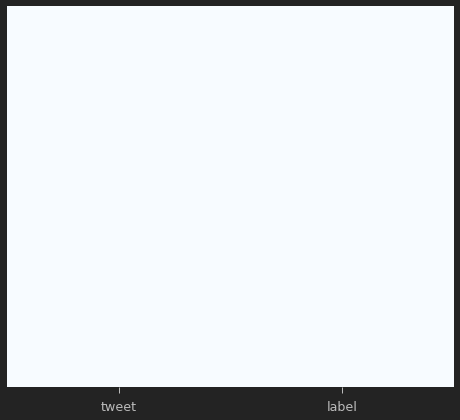

In [12]:
sns.heatmap(tweet_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f7291ac8>]],
      dtype=object)

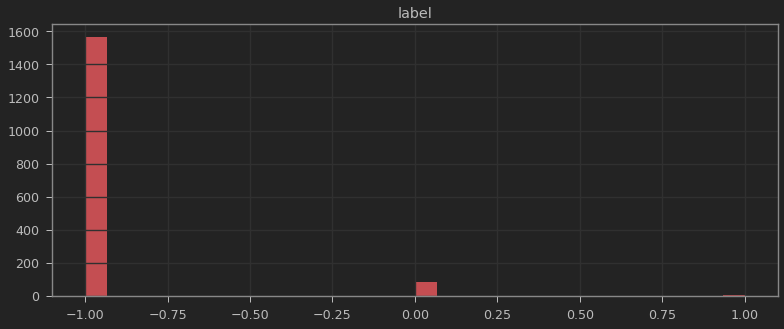

In [13]:
tweet_df.hist(bins=30,figsize=(13,5),color='r')

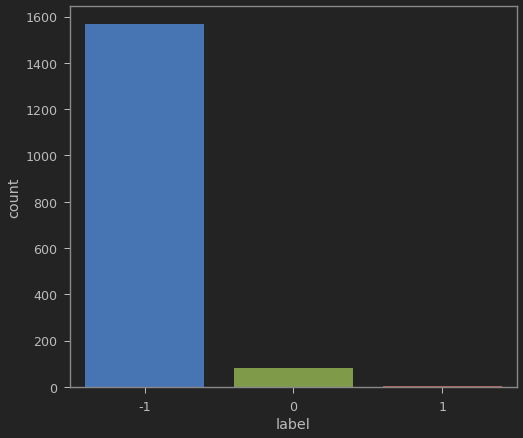

In [14]:
sns.countplot(tweet_df['label'])

In [15]:
# check the number of neutral vs. negative  and positives tagged sentences
neutrals = tweet_df['label'][tweet_df.label == 0]
negatives = tweet_df['label'][tweet_df.label == -1]
positives = tweet_df['label'][tweet_df.label == 1]

print('number of neutral tagged sentences is:  {}'.format(len(neutrals)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('number of positive tagged sentences is: {}'.format(len(positives)))

print('total length of the data is:            {}'.format(tweet_df.shape[0]))

number of neutral tagged sentences is:  82
number of negative tagged sentences is: 1566
number of positive tagged sentences is: 4
total length of the data is:            1652


In [16]:
tweet_df['label'].value_counts()

-1    1566
 0      82
 1       4
Name: label, dtype: int64

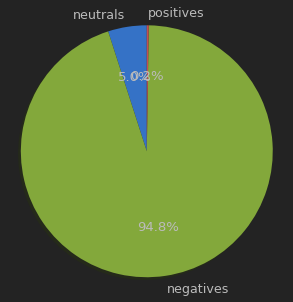

In [17]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'neutrals', 'negatives','positives'

# Sizes for each slide
sizes = [len(neutrals), len(negatives),len(positives)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [18]:
# to get the length of every tweet
tweet_df['length']=tweet_df['tweet'].apply(len)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1652 non-null   object
 1   label   1652 non-null   int64 
 2   length  1652 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 38.8+ KB


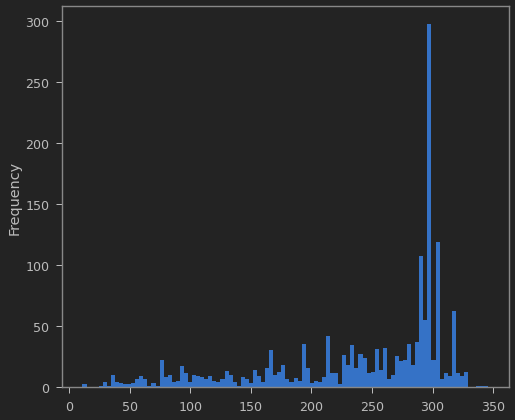

In [19]:
tweet_df['length'].plot(bins=100,kind='hist')

This is showing the lenght of each tweet based on number of characters

In [20]:
# get a word count per sentence column
#.split() will string into word list
def word_count(sentence):
    return len(sentence.split())
    
tweet_df['word count'] = tweet_df['tweet'].apply(word_count)
tweet_df.head(10)

,tweet,label,length,word count
0,RT @pragyakaul : Also if you’re wondering wher...,-1,259,37
1,RT @FaiolaLabUCI : I'm going to re-tweet this ...,-1,285,37
2,RT @Mooaz_Akinbola : United States Immigration...,-1,213,31
3,"@DeanCraigMSU @DeanCraigMSU - also, what about...",0,175,24
4,RT @HerMajestyAri : Put a finger down XENOPHOB...,-1,92,11
5,RT @ani_kokobobo : This is a letter by univers...,-1,162,23
6,@krocschool Here’s a PETITION you can sign and...,-1,240,37
7,RT @alexandravbotez : The #StudentBan is beyon...,-1,299,45
8,RT @bnserer : already contacted your represent...,-1,317,41
9,@DeanCraigMSU @DeanCraigMSU - is there a ratio...,0,131,18


In [21]:
tweet_df.describe()

,label,length,word count
count,1652.000000,1652.000000,1652.000000
mean,-0.945521,241.302058,35.371671
std,0.237462,75.238262,12.684347
min,-1.000000,11.000000,1.000000
25%,-1.000000,197.750000,27.000000
50%,-1.000000,277.000000,39.000000
75%,-1.000000,298.000000,45.000000
max,1.000000,346.000000,56.000000


In [22]:
# let's take a look at the longest tweet
tweet_df[tweet_df['length']==346]['tweet'].iloc[0]

"@guertin @siointerrupted @AGUSciPolicy Ty for your support. The ICE doc is detrimental to the education and future plans of so many. It'll also damage the US economy &amp; higher ed system. Watch the YT video pinned on my pg. to hear my host son's story. Please RT to help.\n\n#LiftTheTravelBan #OpenUSConsulates #StudentBan https://t.co/7o5hb0ErND"

In [23]:
# let's take a look at the shortest tweet
tweet_df[tweet_df['length']==11]['tweet'].iloc[0]

'#StudentBan'

In [24]:
# let's take a look at the average tweet
tweet_df[tweet_df['length']==241]['tweet'].iloc[0]

'@ergodicwalk Here’s a PETITION you can sign and share to help allow international students with valid visas to stay in the US to continue their studies even if instruction is online due to the pandemic! \n#StudentBan \n\nhttps://t.co/qjqzMHxdeV'

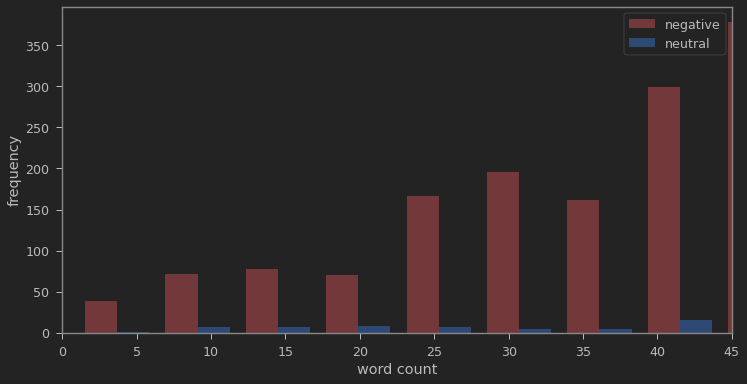

In [25]:
# plot word count distribution for both neutral and negative sentiments
x = tweet_df['word count'][tweet_df.label == -1]
y = tweet_df['word count'][tweet_df.label == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['negative','neutral'])
plt.legend(loc='upper right')

From the graph above, most sentences fall between 25–40 words but it’s fair to say that majority of text on twitter falls between 1 and 45 words. This is no wonder considering that twitter has a limit of how many characters one can use in a message. 280 characters is the limit. In all, it looks like 1–40 words covers more than 90% of all sentences which makes this dataset set a good training candidate.



In [26]:
# get most common words in training dataset
all_words = []
for line in list(tweet_df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
collections.Counter(all_words).most_common(10)

[('to', 2349),
 ('the', 2160),
 ('#studentban', 1342),
 ('rt', 1335),
 (':', 1325),
 ('is', 1295),
 ('and', 1264),
 ('a', 1083),
 ('international', 843),
 ('of', 784)]

In the cell above we extracted the most common words in the dataset and listed the top ten. Perhaps to no surprise we encounter words like 'to', and and is as they are very highly used in human expressions. These kind of words usually appear equally in both negative and positive oriented expressions and as such they bring very little information that can be incorporated in the model so we will have to get rid of them down the road. In the text preprocessing steps later on we will learn how to deal with these common words that don’t add much to the feature space. Below is a code to output a graph showing the frequency of the first 25 words.

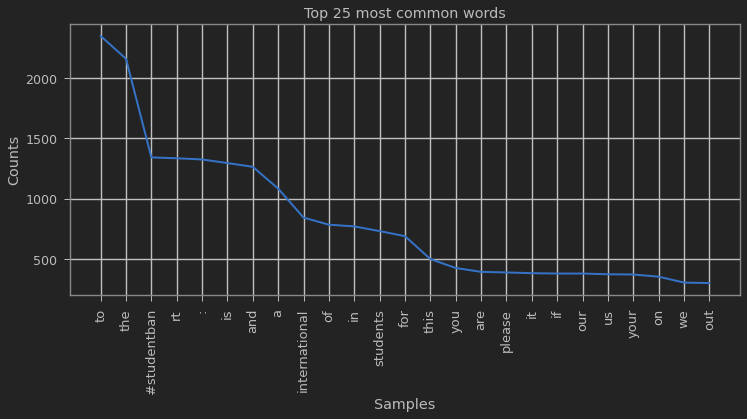

In [27]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
#word_counts = sorted(Counter(all_words).values(), reverse=True)
#plt.figure(figsize=(12,5))
#plt.loglog(word_counts, linestyle='-', linewidth=1.5)
#plt.ylabel("Freq")
#plt.xlabel("Word Rank")
#plt.title('log-log plot of words frequency')

In [28]:
neutrals = tweet_df[tweet_df.label == 0]
neutrals

,tweet,label,length,word count
3,"@DeanCraigMSU @DeanCraigMSU - also, what about...",0,175,24
9,@DeanCraigMSU @DeanCraigMSU - is there a ratio...,0,131,18
32,RT @krocschool : Read our full statement from ...,0,143,16
46,@LizLewisPhD I am confused too. I think there ...,0,129,20
100,"Though the story is false, it makes perfect se...",0,138,17
...,...,...,...,...
1550,"RT @neuroprinciples : American citizens, pleas...",0,169,20
1558,RT @emmacdreher : I'm an international PhD stu...,0,304,53
1585,It feels off to celebrate with the #StudentBan...,0,276,44
1643,RT @GCBCoalition : 👉WHY IS @SenatorDurbin DENY...,0,297,27


In [29]:
negatives = tweet_df[tweet_df.label == -1]
negatives

,tweet,label,length,word count
0,RT @pragyakaul : Also if you’re wondering wher...,-1,259,37
1,RT @FaiolaLabUCI : I'm going to re-tweet this ...,-1,285,37
2,RT @Mooaz_Akinbola : United States Immigration...,-1,213,31
4,RT @HerMajestyAri : Put a finger down XENOPHOB...,-1,92,11
5,RT @ani_kokobobo : This is a letter by univers...,-1,162,23
...,...,...,...,...
1646,"RT @ConnorBrashier : Studying at UCLA, i’ve be...",-1,291,47
1647,RT @resto_in_pesto : ‼️UC STUDENTS‼️\nA group ...,-1,303,42
1648,RT @Sunkesharee : 5) If you are faculty to rea...,-1,270,41
1649,RT @Sunkesharee : 4) International students pa...,-1,287,48


In [30]:

positives = tweet_df[tweet_df.label == 1]
positives

,tweet,label,length,word count
163,Look at this! #F1visa #StudentBan https://t.co...,1,57,6
692,RT @Sameera_Nayak : If you’re asking for the #...,1,298,53
834,Y'all just graduate and take our good payin jo...,1,299,56
1482,RT @justinenglund : petition for uw to create ...,1,165,23


## Task #4: Plot the word cloud

In [31]:
! pip install wordcloud
from wordcloud import WordCloud 

Plotting Word Cloud

In [32]:
# convert all  the tweets into a list 
sentences=tweet_df['tweet'].tolist()

In [33]:
sentences

['RT @pragyakaul : Also if you’re wondering where this #StudentBan lies in the history of xenophobic racism in the United States, just take a look at these statistics on international students. Who, again, is disproportionately impacted? https://t.co/ufSF09XmHk',
 "RT @FaiolaLabUCI : I'm going to re-tweet this petition again. Only ~25,000 more signatures until the goal is reached. Stand in solidarity with our international students and let this administration know the #StudentBan is unacceptable. \n\nhttps://t.co/I8gBSiyE3H https://t.co/KIVFGMIRu9",
 'RT @Mooaz_Akinbola : United States Immigration and Customs Enforcement: Allow F-1 and M-1 students with valid visas to stay in the United States - Sign the Petition! https://t.co/fsLSooiCpi via @Change #StudentBan',
 '@DeanCraigMSU @DeanCraigMSU - also, what about the students who are not doing research (specifically the thesis-based masters)?  Is there a work-around for them? \n\n#StudentBan',
 'RT @HerMajestyAri : Put a finger down XENO

In [34]:
# number of tweets
len(sentences)

1652

In [35]:
# join all the sentences i.e. combining all the tweets in one massive string
sentences_as_one_string= " ".join(sentences) # join all data

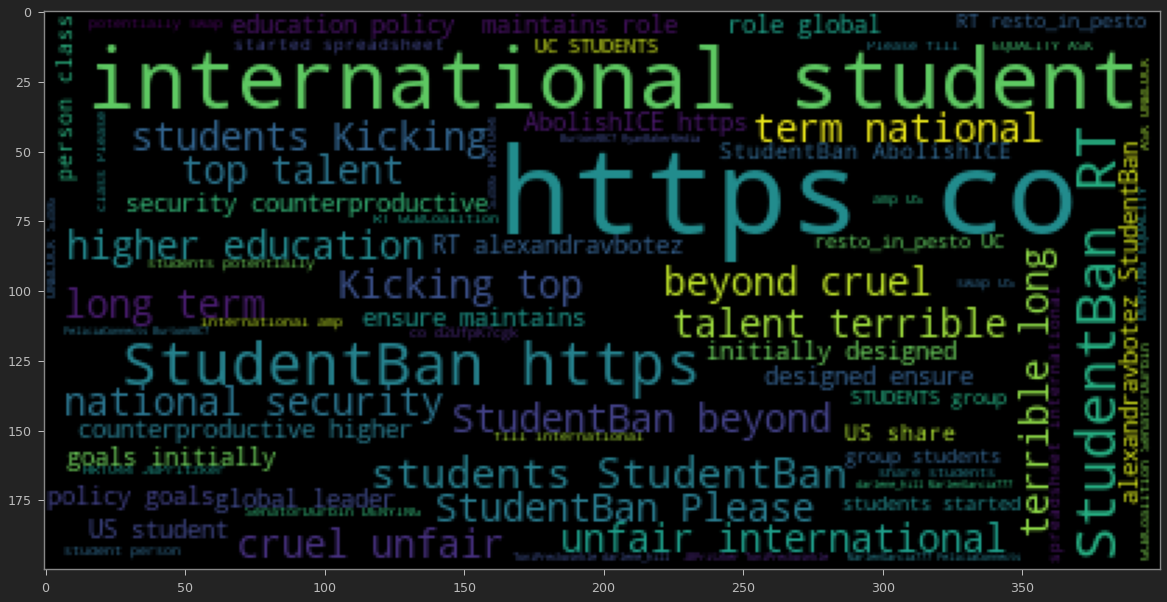

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

The word cloud is visualization of the tweet texts. we can see kicking, terrible, unfair cruel so the general sentiment is a quiet negative

In [37]:
# visualize negative cloud, convert negative tweets to a list
negative_list=negatives['tweet'].tolist()

In [38]:
# join the list of tweets into a mssive string
negative_sentences_as_one_string=" ".join(negative_list)

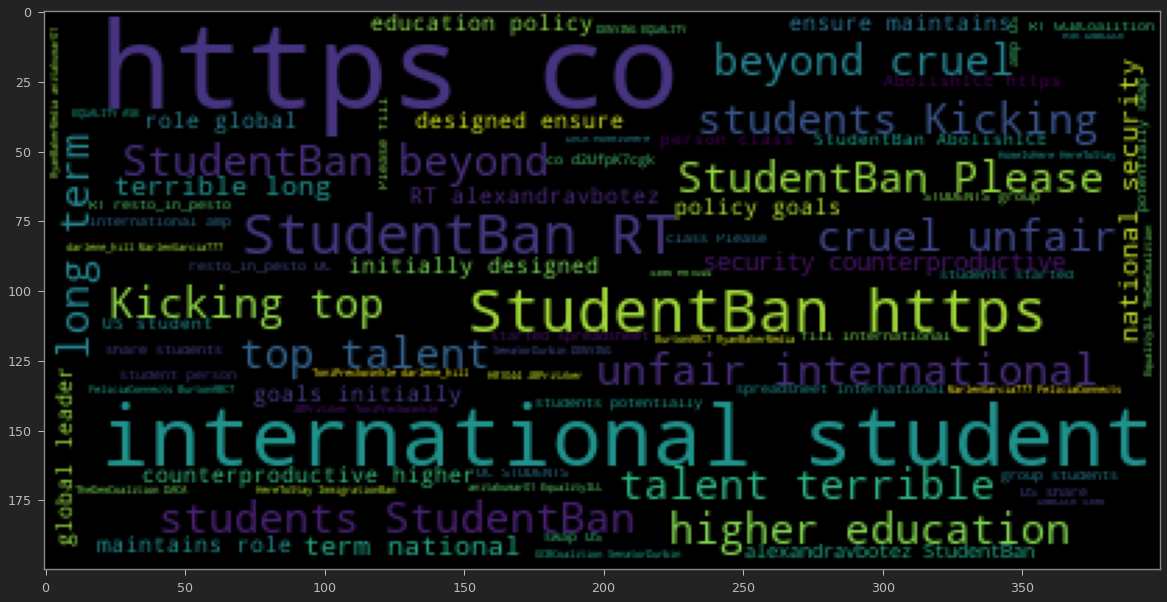

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Task #5: Perform data cleaning - removing punctuation

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

This is the punctioation that I mostly need to remove

In [41]:
# apply the punctuation removal on the average tweet
tweet_240="@ergodicwalk Here’s a PETITION you can sign and share to help allow international students with valid visas to stay in the US to continue their studies even if instruction is online due to the pandemic! \n#StudentBan \n\nhttps://t.co/qjqzMHxdeV"
Test=tweet_240

Test_punc_removed=[ char for char in Test if char not in string.punctuation ]
Test_punc_removed

['e',
 'r',
 'g',
 'o',
 'd',
 'i',
 'c',
 'w',
 'a',
 'l',
 'k',
 ' ',
 'H',
 'e',
 'r',
 'e',
 '’',
 's',
 ' ',
 'a',
 ' ',
 'P',
 'E',
 'T',
 'I',
 'T',
 'I',
 'O',
 'N',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 's',
 'i',
 'g',
 'n',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'h',
 'a',
 'r',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'h',
 'e',
 'l',
 'p',
 ' ',
 'a',
 'l',
 'l',
 'o',
 'w',
 ' ',
 'i',
 'n',
 't',
 'e',
 'r',
 'n',
 'a',
 't',
 'i',
 'o',
 'n',
 'a',
 'l',
 ' ',
 's',
 't',
 'u',
 'd',
 'e',
 'n',
 't',
 's',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'v',
 'a',
 'l',
 'i',
 'd',
 ' ',
 'v',
 'i',
 's',
 'a',
 's',
 ' ',
 't',
 'o',
 ' ',
 's',
 't',
 'a',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'S',
 ' ',
 't',
 'o',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'u',
 'e',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 's',
 't',
 'u',
 'd',
 'i',
 'e',
 's',
 ' ',
 'e',
 'v',
 'e',
 'n',
 ' ',
 'i',
 'f',
 ' ',
 'i',
 'n',
 's',
 't',
 'r',
 'u',
 'c',
 't'

In [42]:
# join the characters back to its words
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'ergodicwalk Here’s a PETITION you can sign and share to help allow international students with valid visas to stay in the US to continue their studies even if instruction is online due to the pandemic \nStudentBan \n\nhttpstcoqjqzMHxdeV'

now after cleaning from punctiation, i still need to remove the uneeded words, those are common words that dosn't add any extra info to my text

## Task #6: Perform Data Cleaning from the Stop words,  and Tokenization
Now we will clean first from stopwords and tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [43]:
import nltk # Natural Language Toolkit (NLTK)

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
# download the stopword package in English Language
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
Test_punc_removed_join_clean=[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ] # .split() to split the tweet to different words
Test_punc_removed_join_clean

['ergodicwalk',
 'Here’s',
 'PETITION',
 'sign',
 'share',
 'help',
 'allow',
 'international',
 'students',
 'valid',
 'visas',
 'stay',
 'US',
 'continue',
 'studies',
 'even',
 'instruction',
 'online',
 'due',
 'pandemic',
 'StudentBan',
 'httpstcoqjqzMHxdeV']

In [47]:
# cleaning the longest tweet from puctiation and stopwords
tweet_340='@guertin @siointerrupted @AGUSciPolicy Ty for your support. The ICE doc is detrimental to the education and future plans of so many. It ll also damage the US economy &amp; higher ed system. Watch the YT video pinned on my pg. to hear my host sons story. Please RT to help LiftTheTravelBan OpenUSConsulates StudentBan https://t.co/7o5hb0ErND'

Test_punc_removed=[ char for char in tweet_340 if char not in string.punctuation ]
 
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join_clean=[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ] # .split() to split the tweet to different words
Test_punc_removed_join_clean
 


['guertin',
 'siointerrupted',
 'AGUSciPolicy',
 'Ty',
 'support',
 'ICE',
 'doc',
 'detrimental',
 'education',
 'future',
 'plans',
 'many',
 'also',
 'damage',
 'US',
 'economy',
 'amp',
 'higher',
 'ed',
 'system',
 'Watch',
 'YT',
 'video',
 'pinned',
 'pg',
 'hear',
 'host',
 'sons',
 'story',
 'Please',
 'RT',
 'help',
 'LiftTheTravelBan',
 'OpenUSConsulates',
 'StudentBan',
 'httpstco7o5hb0ErND']

## Task #7: Perform Count Vectorization 

In [48]:
longest_tweet= ['guertin','siointerrupted','AGUSciPolicy','Ty','support','ICE','doc','detrimental','education','future','plans','many', 'also','damage','US','economy',
 'amp','higher','ed','system','Watch','YT', 'video','pinned','pg','hear','host','sons','story','Please','RT', 'help','LiftTheTravelBan','OpenUSConsulates','StudentBan','httpstco7o5hb0ErND']



In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# initiate an object out of my class
vectorizer=CountVectorizer()


X=vectorizer.fit_transform(longest_tweet)
X # X is the tokenized version of the longest tweet string

<36x36 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [50]:
# To get every single unique word
print(vectorizer.get_feature_names())


['aguscipolicy', 'also', 'amp', 'damage', 'detrimental', 'doc', 'economy', 'ed', 'education', 'future', 'guertin', 'hear', 'help', 'higher', 'host', 'httpstco7o5hb0ernd', 'ice', 'liftthetravelban', 'many', 'openusconsulates', 'pg', 'pinned', 'plans', 'please', 'rt', 'siointerrupted', 'sons', 'story', 'studentban', 'support', 'system', 'ty', 'us', 'video', 'watch', 'yt']


In [51]:
print(X.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Task #8: Create a pipeline to remove stop-words, punctuation, and perform tokenization

Now let's define a pipeline to clean up all the messages.
The pipeline performs the follwoing:(1) remove punctiation,(2) remove stopwords

In [52]:
def message_cleaning(message):
  ''' pipeline function performs the follwoing:
  (1) remove punctiation,
  (2) remove stopwords'''


  Test_punc_removed=[char for char in message if char not in string.punctuation]
  Test_punc_removed_join=''.join(Test_punc_removed)
  Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  return Test_punc_removed_join_clean

In [53]:
# let's test the newly added function
tweet_df_clean=tweet_df['tweet'].apply(message_cleaning)
tweet_df_clean.head()
print(tweet_df_clean[5]) # cleaning tweet in index 5

['RT', 'anikokobobo', 'letter', 'university', 'faculty', '1500', 'signatures', 'condemning', 'ICE', 'StudentBan', 'Please', 'sign', 'httpstco4UE5t9XPNH']


#Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 



In [54]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline that we defined earlier so we clean the tweets first before vectorizing it
vectorizer=CountVectorizer(analyzer=message_cleaning)
tweet_vectorizer= CountVectorizer(analyzer=message_cleaning).fit_transform(tweet_df['tweet']).toarray()                  

In [55]:
tweet_vectorizer.shape


(1652, 3805)

So this means I have 1652 rows corresponding to the number of tweets and  3805 unique words which represnts my features

In [56]:
X=tweet_vectorizer
y=tweet_df['label'] # which is my sentiment
y.shape

(1652,)

## Task #10: Train a Naive Bayes Classifier

In [57]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y)

In [58]:
from sklearn.naive_bayes import MultinomialNB
#initiate the object
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test= NB_classifier.predict(X_test)


## Task #11: Assess trained model performance


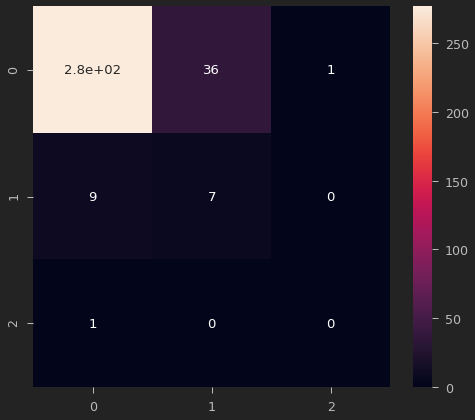

In [60]:
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True) 

### Interpret the Confusion Matrix:
The model was able to correctly classify around 270  as True Negative and 15 tweets as True Positve  i.e. 285 tweets out of my testing sample of 330, 285/330= 86.4% and miscalssify zero tweet as False Negative and 45 as False positive, which is 45/330=14% of misclassification

Even though the model accuracy of 86% is a good but we can still improve the accuracy, particularly if you address the imbalance dataset. For example to create upsample let's say the positive class and downsample the negative class, maybe adding some feature engineering classification there. Let's go a head and print the classification report.

## Classification Report

In [61]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

          -1       0.97      0.88      0.92       314
           0       0.16      0.44      0.24        16
           1       0.00      0.00      0.00         1

    accuracy                           0.86       331
   macro avg       0.38      0.44      0.39       331
weighted avg       0.92      0.86      0.89       331



We have here overall a weighted avg accuracy of 97%, 86% ,90%.I will try firt balance the dataset, and I will also try diferent modeling with neural net work,XGboost,and logistic regression